In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f1nalyze-datathon-ieeecsmuj/sample_submission.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv


In [2]:
import pandas as pd

# Replace 'filename.csv' with the actual CSV file name in the dataset
train = '/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv'
train_ = pd.read_csv(train)

# Display the first few rows of the DataFrame
train_.head()


/tmp/ipykernel_18/808774217.py:5: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train_ = pd.read_csv(train)


,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [3]:
train_.shape

(2830101, 55)

In [4]:
test = '/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv'
test_ = pd.read_csv(test)

# Display the first few rows of the DataFrame
test_.head()


/tmp/ipykernel_18/1057555290.py:2: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test_ = pd.read_csv(test)


,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,driverStandingsId,raceId_y,points_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,23949,997,4,1,14,13,8,8,8,4.0,...,12474,93,16.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,298739826
1,23949,997,4,1,14,13,8,8,8,4.0,...,12494,94,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299218806
2,23949,997,4,1,14,13,8,8,8,4.0,...,12514,95,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299697786
3,23949,997,4,1,14,13,8,8,8,4.0,...,12534,96,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300176766
4,23949,997,4,1,14,13,8,8,8,4.0,...,12554,97,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300655746


In [5]:
test_.shape

(352928, 53)

In [6]:
validation = '/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv'
validation_ = pd.read_csv(validation)

# Display the first few rows of the DataFrame
validation_.head()

/tmp/ipykernel_18/1621448255.py:2: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_ = pd.read_csv(validation)


,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,driverStandingsId,raceId_y,points_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,23949,997,4,1,14,13,8,8,8,4.0,...,12474,93,16.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,298739826
1,23949,997,4,1,14,13,8,8,8,4.0,...,12494,94,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299218806
2,23949,997,4,1,14,13,8,8,8,4.0,...,12514,95,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299697786
3,23949,997,4,1,14,13,8,8,8,4.0,...,12534,96,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300176766
4,23949,997,4,1,14,13,8,8,8,4.0,...,12554,97,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300655746


In [7]:
import pandas as pd
import numpy as np
import os

In [8]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv')
test = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv')
validation = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv')
train = train[:1000]
test = test[:1000]
validation = validation[:1000]

# Display the first few rows of each DataFrame
print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())

print("\nValidation Data:")
print(validation.head())

# Check for missing values
print("\nMissing values in Train Data:")
print(train.isnull().sum())

print("\nMissing values in Test Data:")
print(test.isnull().sum())

print("\nMissing values in Validation Data:")
print(validation.isnull().sum())

# Convert non-numeric values to NaN and handle them
train.replace('\\N', np.nan, inplace=True)
test.replace('\\N', np.nan, inplace=True)
validation.replace('\\N', np.nan, inplace=True)

# Convert columns to appropriate data types
train = train.apply(pd.to_numeric, errors='ignore')
test = test.apply(pd.to_numeric, errors='ignore')
validation = validation.apply(pd.to_numeric, errors='ignore')

# Fill missing values (can also use other strategies like mean/median imputation)
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
validation.fillna(method='ffill', inplace=True)


/tmp/ipykernel_18/576494121.py:8: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv')
/tmp/ipykernel_18/576494121.py:9: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv')
/tmp/ipykernel_18/576494121.py:10: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  validation = pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv')


Train Data:
   resultId  racerId  driverId  constructorId number  grid position_x  \
0     20025      833       642             51      2     1          1   
1     20025      833       642             51      2     1          1   
2     20025      833       642             51      2     1          1   
3     20025      833       642             51      2     1          1   
4     20025      833       642             51      2     1          1   

  positionText_x  positionOrder  points  ...  points_y position  \
0              1              1     9.0  ...      3.33        3   
1              1              1     9.0  ...      6.33        3   
2              1              1     9.0  ...      6.33        4   
3              1              1     9.0  ...     10.33        3   
4              1              1     9.0  ...     10.33        4   

  positionText_y wins constructorRef     company nationality_y  \
0              3    0           alfa  Alfa Romeo         Swiss   
1             

/tmp/ipykernel_18/576494121.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace('\\N', np.nan, inplace=True)
/tmp/ipykernel_18/576494121.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace('\\N', np.nan, inplace=True)
/tmp/ipykernel_18/576494121.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


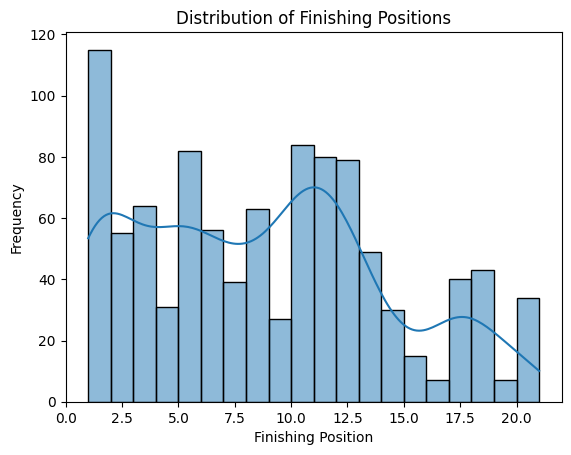

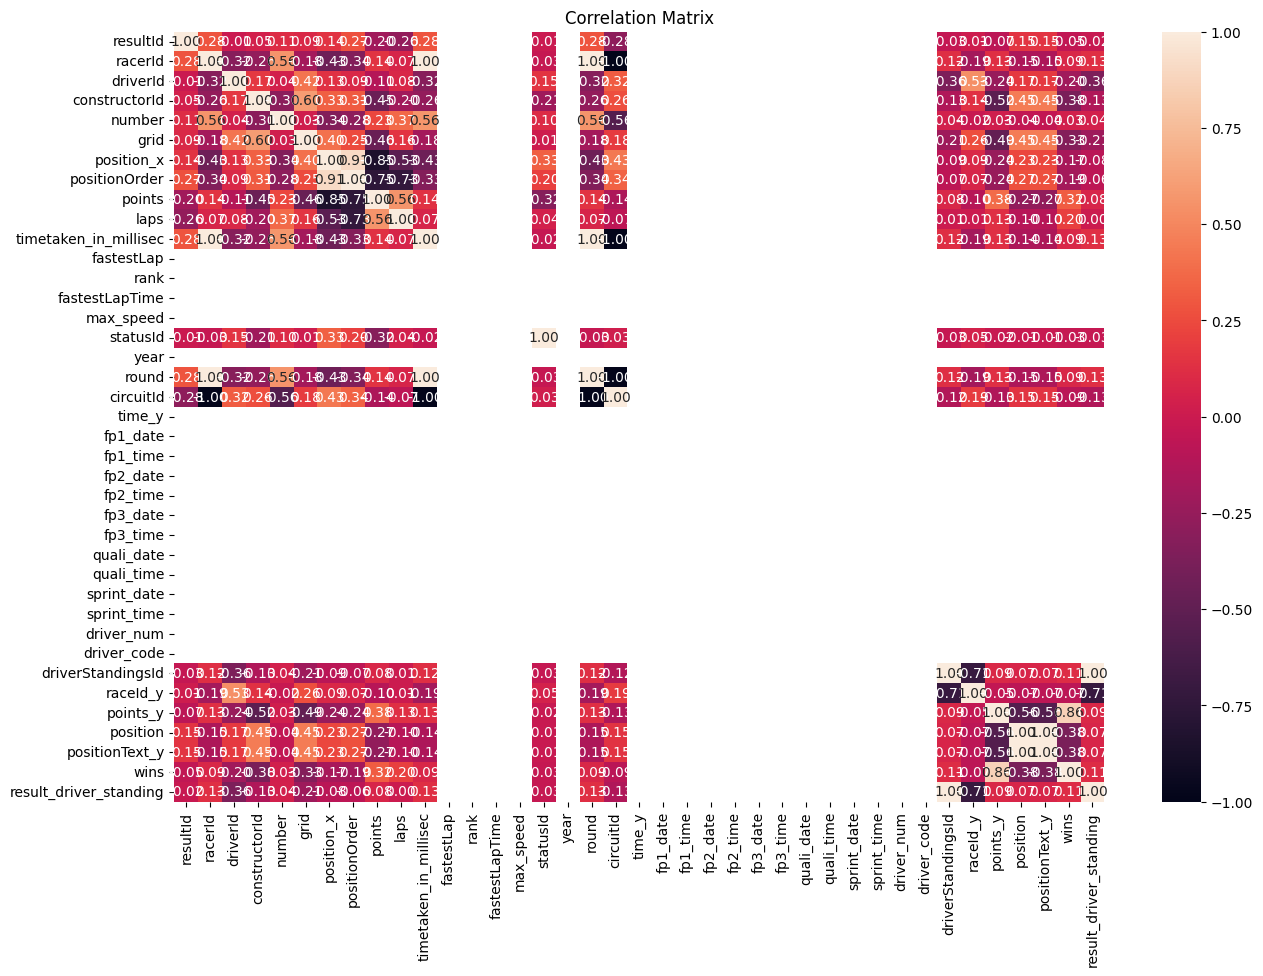

In [9]:
# Visualize the distribution of the target variable (positionOrder) in the train set
sns.histplot(train['positionOrder'], bins=20, kde=True)
plt.title('Distribution of Finishing Positions')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix for numeric columns only
numeric_cols = train.select_dtypes(include=[np.number]).columns
corr_matrix = train[numeric_cols].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Feature Engineering: Creating new features from existing columns
train['grid_position_diff'] = train['grid'] - train['positionOrder']
test['grid_position_diff'] = test['grid'] - test['positionOrder']
validation['grid_position_diff'] = validation['grid'] - validation['positionOrder']

# Select relevant features for modeling
features = ['racerId', 'driverId', 'constructorId', 'grid', 'points', 'grid_position_diff']
target = 'positionOrder'

X_train = train[features]
y_train = train[target]

X_test = test[features]
X_val = validation[features]
y_val = validation[target]


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_split, y_train_split)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
y_train_pred = best_rf.predict(X_train_split)
y_val_pred = best_rf.predict(X_val_split)

train_rmse = np.sqrt(mean_squared_error(y_train_split, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val_split, y_val_pred))

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

# Test set predictions
y_test_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_s

In [12]:
# Evaluate the model on the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_test_pred))
print(f"Test RMSE: {val_rmse}")

# Save the predictions for submission
submission = pd.DataFrame({'resultId': test['resultId'], 'predicted_positionOrder': y_test_pred})
submission.to_csv('submission.csv', index=False)


Test RMSE: 6.377626261653574
